<a href="https://colab.research.google.com/github/aditi-govindu/Image-Classsification-using-sklearn/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create directory **Classification_Images** and download 30 images of each category using bing image downloader.

In [ ]:
%mkdir Classification_Images

In [ ]:
!pip install bing_image_downloader

In [ ]:
# Import images using bing downloader
from bing_image_downloader import downloader
downloader.download("icecream cone",limit=30, output_dir="Classification_Images",adult_filter_off=True)

In [ ]:
# Import puppy images using bing downloader
from bing_image_downloader import downloader
downloader.download("cute puppy",limit=30, output_dir="Classification_Images",adult_filter_off=True)

In [ ]:
# Import rose images using bing downloader
from bing_image_downloader import downloader
downloader.download("red rose",limit=30, output_dir="Classification_Images",adult_filter_off=True)

Download **Classification_Images** folder locally

In [ ]:
import shutil
shutil.make_archive('Classification_Images', 'zip', 'Classification_Images')

'/content/Classification_Images.zip'

Generate **requirements.txt**

In [ ]:
# Find all files needed to run this code
!pip freeze > requirements.txt

**Preprocessing of data** using os module

In [36]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray

target = []
flat_data = []
images = []
DataDirectory = '/content/drive/MyDrive/Classification_Images'
#/content/drive/MyDrive/Classification_Images
# Images to be classified as:
Categories = ["cute puppy","icecream cone","red rose"]

for i in Categories:
  print("Category is:",i,"\tLabel encoded as:",Categories.index(i))
  # Encode categories cute puppy as 0, icecream cone as 1 and red rose as 2
  target_class = Categories.index(i)
  # Create data path for all folders under MinorProject
  path = os.path.join(DataDirectory,i)
  # Image resizing, to ensure all images are of same dimensions
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    # Skimage normalizes the value of image
    img_resized = resize(img_array,(150,150,3))
    # Convert images to grayscale
    img_resized_gray = rgb2gray(img_resized)
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(target_class)
# Convert list to numpy array format
flat_data = np.array(flat_data)
images = np.array(images)
target = np.array(target)

Category is: cute puppy 	Label encoded as: 0
Category is: icecream cone 	Label encoded as: 1
Category is: red rose 	Label encoded as: 2


**Dataframe creation** using pandas library

In [37]:
df = pd.DataFrame(flat_data)
# Create a column for output data called Target
df['Target'] = target
# Rows are all the input images (90 images, 30 of each category)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.458523,0.313725,0.177686,0.462745,0.313725,0.165882,0.462745,0.313725,0.164706,0.460654,0.319752,0.172275,0.450157,0.314026,0.167804,0.447451,0.314118,0.168928,0.447059,0.313725,0.168627,0.448562,0.309804,0.168627,0.435294,0.298039,0.163529,0.427451,0.290196,0.153333,0.435294,0.286667,0.156863,0.435294,0.286275,0.153843,0.435294,0.282353,0.152941,0.431373,...,0.347320,0.225752,0.175686,0.356863,0.235294,0.173190,0.346275,0.220784,0.161961,0.346275,0.212941,0.158954,0.346275,0.218967,0.154118,0.350196,0.224706,0.154118,0.342092,0.219882,0.142092,0.331804,0.216954,0.138523,0.350627,0.236078,0.158471,0.330837,0.211647,0.144706,0.314902,0.196340,0.139477,0.309804,0.184314,0.136078,0.293203,0.174641,0.104967,0
1,0.458523,0.313725,0.177686,0.462745,0.313725,0.165882,0.462745,0.313725,0.164706,0.460654,0.319752,0.172275,0.450157,0.314026,0.167804,0.447451,0.314118,0.168928,0.447059,0.313725,0.168627,0.448562,0.309804,0.168627,0.435294,0.298039,0.163529,0.427451,0.290196,0.153333,0.435294,0.286667,0.156863,0.435294,0.286275,0.153843,0.435294,0.282353,0.152941,0.431373,...,0.347320,0.225752,0.175686,0.356863,0.235294,0.173190,0.346275,0.220784,0.161961,0.346275,0.212941,0.158954,0.346275,0.218967,0.154118,0.350196,0.224706,0.154118,0.342092,0.219882,0.142092,0.331804,0.216954,0.138523,0.350627,0.236078,0.158471,0.330837,0.211647,0.144706,0.314902,0.196340,0.139477,0.309804,0.184314,0.136078,0.293203,0.174641,0.104967,0
2,0.195529,0.191608,0.175922,0.199451,0.188235,0.176471,0.210850,0.192029,0.180264,0.223529,0.196078,0.194797,0.227451,0.200000,0.200000,0.227451,0.201641,0.203640,0.227451,0.205248,0.207843,0.226275,0.210588,0.214510,0.227451,0.211765,0.215686,0.235294,0.219990,0.223529,0.238667,0.227451,0.231373,0.243097,0.234498,0.238419,0.247059,0.238667,0.242588,0.247059,...,0.364706,0.392810,0.301961,0.325176,0.360758,0.270562,0.278039,0.317255,0.234835,0.326134,0.361872,0.275111,0.386484,0.417856,0.327660,0.378667,0.410039,0.319843,0.370386,0.406013,0.320072,0.313888,0.357025,0.265098,0.329882,0.371603,0.284701,0.313882,0.345804,0.286611,0.271869,0.295948,0.235660,0.289098,0.319922,0.245961,0.211216,0.234928,0.176105,0
3,0.440967,0.361098,0.268418,0.422510,0.336523,0.260758,0.424976,0.334780,0.277002,0.427399,0.331843,0.284680,0.408654,0.314787,0.266039,0.405671,0.310123,0.257215,0.458323,0.333905,0.281879,0.482222,0.354248,0.298797,0.450431,0.328366,0.265072,0.402163,0.292680,0.229405,0.381103,0.290196,0.232497,0.378783,0.297868,0.240509,0.397298,0.297473,0.231983,0.476021,...,0.230196,0.168410,0.127277,0.244586,0.178442,0.137213,0.456763,0.330018,0.298332,0.487475,0.343423,0.289900,0.522552,0.404427,0.331620,0.382013,0.276889,0.230902,0.390905,0.276108,0.180265,0.448380,0.344347,0.255772,0.255059,0.168141,0.136209,0.478923,0.381720,0.323603,0.694275,0.575843,0.454248,0.704120,0.549349,0.412382,0.723920,0.570376,0.454771,0
4,0.563804,0.580092,0.572248,0.560183,0.579941,0.575869,0.559882,0.579791,0.575569,0.556664,0.580194,0.572651,0.562595,0.591706,0.584163,0.555959,0.591856,0.587331,0.572601,0.591606,0.592510,0.572549,0.592007,0.601810,0.572549,0.592157,0.603922,0.564706,0.584314,0.599749,0.551582,0.571190,0.586876,0.499440,0.519048,0.534734,0.426336,0.445943,0.461630,0.362431,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,.

AxesImage(54,36;334.8x217.44)


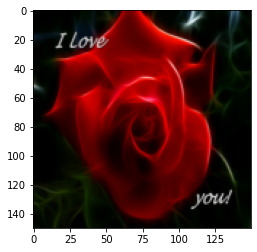

In [39]:
# Display 1 resized image 
print(plt.imshow(images[89]))

**Test and train dataset** creation using sklearn library functions
1.   Data is first split into input and output
2.   Input and Output are further split into testing and training data, individually



In [40]:
# Split data into input and output sets
from sklearn.model_selection import train_test_split

# x is all input values of images and their pixel values (90 images * 67500)
# y is output values or correct label of image (90 images * 1 column of labels)

x = df.iloc[:,:-1].values
y = target
print("Input data dimensions:",x.shape)
print("Output data dimensions:",y.shape)

# Stratify ensures every image is divided in equal proportions (no bias)
x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=True,test_size = 0.3,random_state=109,stratify=y)
print("Dimensions of input training data:",x_train.shape)
print("Dimensions of input testing data:",x_test.shape)
print("Dimensions of output training data:",y_train.shape)
print("Dimensions of output testing data:",y_test.shape)

Input data dimensions: (90, 67500)
Output data dimensions: (90,)
Dimensions of input training data: (63, 67500)
Dimensions of input testing data: (27, 67500)
Dimensions of output training data: (63,)
Dimensions of output testing data: (27,)


In [41]:
# Check if testing and training data are divided in equal proportions
print("Labels\t\t   Image index considered")
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

Labels		   Image index considered
(array([0, 1, 2]), array([21, 21, 21]))
(array([0, 1, 2]), array([9, 9, 9]))


**Classification** using SVM

In [42]:
# Applying Support Vector Machine classifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]
                    
# Apply GridSearchCV to find best parameters for given dataset
# verbose is used to describe the steps taken to find best parameters
cv = GridSearchCV(SVC(), tuned_parameters, refit = True,verbose= 3) 
cv.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=1, gamma=0.001, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=1.000, total=   0.5s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.923, total=   0.5s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=1.000, total=   0.6s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=1.000, total=   0.5s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.917, total=   0.5s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.846, total=   0.5s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.846, total=   0.5s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.923, total=   0.5s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.833, total=   0.5s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   18.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [43]:
# Display parameters selected by GridSearchCV for SVM 3 classes
# Parameters obtained: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
print("Best parameters to apply are:",cv.best_params_)
# Display model after hyperparameter tuning
svm = cv.best_estimator_
print("Model after tuning is:\n",svm)

Best parameters to apply are: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Model after tuning is:
 SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [44]:
# Predict the output of model after above parameters are applied to it
y_prediction = svm.predict(x_test)

In [45]:
# Print expected and predicted output
print("Expected results: ",y_test)
print("Predicted results:",y_prediction)

Expected results:  [1 2 1 0 1 0 0 0 0 1 1 0 0 2 1 2 2 0 1 1 1 0 2 2 2 2 2]
Predicted results: [1 2 1 0 1 0 0 0 0 2 2 0 0 2 1 2 2 0 1 1 2 0 2 2 2 2 2]


**Evaluation of model**


1.   **Precision** measures how many positives were actually positive (Positive predictive ability)
2.   **Recall** measures how many positives were correctly predicted (True positive rate)
3.   **Confusion matri**x is a square matrix where rows are true (expected labels) and columns are predicted labels
4.   **Accuracy** measures correctly classified data vs total data

In [46]:
# Evaluate the model using confusion matrix, classification report and accuracy

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print("Confusion matrix results:\n",confusion_matrix(y_prediction,y_test))
print("\nClassification report of model:\n",classification_report(y_prediction,y_test))
print("Accuracy score:",100*accuracy_score(y_prediction,y_test))

Confusion matrix results:
 [[9 0 0]
 [0 6 0]
 [0 3 9]]

Classification report of model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.67      1.00      0.80         6
           2       1.00      0.75      0.86        12

    accuracy                           0.89        27
   macro avg       0.89      0.92      0.89        27
weighted avg       0.93      0.89      0.89        27

Accuracy score: 88.88888888888889


Save model using **pickle** library

In [58]:
import pickle
# Save SVM model in pickle file
pickle.dump(svm,open("Classification_Model.p","wb"))

In [59]:
# Read byte from pickle model
test_model = pickle.load(open("Classification_Model.p","rb"))

Enter url of image to test: https://upload.wikimedia.org/wikipedia/commons/9/9f/Beautiful_Red_Rose.jpg
Dimensions of original image are: (1520, 2288, 3)
PREDICTED OUTPUT IS: red rose


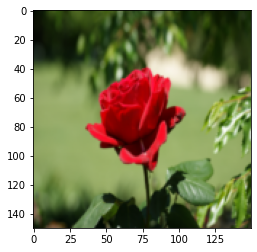

In [61]:
# Testing for a new image
flat_data = []
url = input ('Enter url of image to test: ')
img_array = imread(url)
img_resized = resize(img_array,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print("Dimensions of original image are:",img_array.shape)
plt.imshow(img_resized)
y_output = test_model.predict(flat_data)
y_output = Categories[y_output[0]]
print("PREDICTED OUTPUT IS:",y_output)